# An analysis of the most well-known technology-based YouTube channels.

In [1005]:
import pandas as pd 
import numpy as np 
from dateutil import parser
import isodate
import ast
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
sns.set(style = 'darkgrid', color_codes= True)
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from wordcloud import WordCloud
from nltk.corpus import stopwords
import plotly.express as px
import altair as alt 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/thaophuong/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/thaophuong/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [766]:
df = pd.read_csv("video_youtube_1.csv")
df

Unnamed: 0     video_id      channelTitle  \
0               0  1eI8HpJtq-s  Marques Brownlee   
1               1  -BwUyTrU9fo  Marques Brownlee   
2               2  K6gtEGnbR6I  Marques Brownlee   
3               3  OkLOJapGjC4  Marques Brownlee   
4               4  wR-0knMVSGw  Marques Brownlee   
...           ...          ...               ...   
21323       21323  G_Okyqke9DY           TechRax   
21324       21324  2GLATVa0qVo           TechRax   
21325       21325  i-DZueucksk           TechRax   
21326       21326  g2FsBh7q6CA           TechRax   
21327       21327  Z8WIDhrLmsw           TechRax   

                                                   title  \
0                            I Made My Own Sneaker! M251   
1      I Spent $40,000 to Unbox a Sealed Original iPh...   
2                     A Hidden Google Assistant Feature!   
3           The ROG Phone 7 Ultimate is Just Ridiculous!   
4                The Rivian R1S Is... The Best SUV Ever?   
...                                                  ...   
21323  PSP -Lego Indiana Jones: The Original Adventur...   
21324     8.5" Portable DVD Player from GPX   -Unboxing-   
21325                      iPod Nano 8GB Unboxing -Blue-   
21326                          Lockerz #2 Unboxing Video   
21327                          Lockerz #1 Unboxing Video   

                                             description  \
0      To get the shoes: http://atoms.com/MKBHD\nFirs...   
1      This original sealed iPhone cost $40,000. I re...   
2            It's been smarter than most people realize.   
3      The $1400 ROG Phone 7 Ultimate is the most ded...   
4      Rivian R1S is an awesome, expensive SUV. That'...   
...                                                  ...   
21323  Want to Buy It?\r\n\r\nhttp://www.amazon.com/L...   
21324  Check Out Their Website At:\r\n\r\nhttp://www....   
21325  Check Out The Latest News On idooble!\r\n\r\nh...   
21326  Hey Guys! This is my 2nd Video for my New Yout...   
21327  Hey Guys! This is my opening video for the Cha...   

                                                    tags  \
0      ['MKBHD', 'MKBHD shoe', 'M251', 'Atoms', 'MKBH...   
1      ['original iphone', 'sealed iphone', 'MKBHD', ...   
2      ['Google Assistant', 'Assistant feature', 'Goo...   
3      ['ROG Phone', 'ROG phone 7', 'MKBHD', 'ROG Pho...   
4      ['Rivian', 'Rivian R1S', 'MKBHD', 'R1S SUV', '...   
...                                                  ...   
21323  ['psp', 'firmware', 'lego', 'indiana', 'jones'...   
21324  ['dvd player', 'gpx', 'sony', 'panasonic', '8....   
21325  ['ipod nano', '8gb', '16gb', 'unboxing', 'chri...   
21326  ['lockerz', 'gpt', 'unboxing', 'giveaway', 'le...   
21327  ['lockerz', 'gpt', 'unboxing', 'giveaway', 'le...   

                publishedAt  viewCount  likeCount  favouriteCount  \
0      2023-04-25T14:59:45Z 1097080.00   73703.00             NaN   
1      2023-04-20T22:02:23Z 3507675.00  199802.00             NaN   
2      2023-04-14T14:50:28Z 1209422.00   81095.00             NaN   
3      2023-04-13T12:30:43Z 1555783.00   66134.00             NaN   
4      2023-04-11T23:20:19Z 1938452.00   65995.00             NaN   
...                     ...        ...        ...             ...   
21323  2009-12-31T06:30:52Z   54122.00     501.00             NaN   
21324  2009-12-26T22:43:00Z   32220.00     415.00             NaN   
21325  2009-12-25T20:11:22Z   54202.00     932.00             NaN   
21326  2009-09-25T22:35:42Z   38374.00     550.00             NaN   
21327  2009-09-25T01:26:34Z  256148.00    4678.00             NaN   

       commentCount  duration definition  caption  
0           5574.00    PT7M2S         hd     True  
1           9518.00  PT13M24S         hd     True  
2           1324.00     PT59S         hd    False  
3           3467.00  PT10M49S         hd     True  
4           3287.00  PT14M20S         hd     True  
...             ...       ...        ...      ...  
21323         67.00   PT3M

In [767]:
df.drop('Unnamed: 0',axis = 1, inplace = True)

In [768]:
df.drop('favouriteCount', axis = 1, inplace = True)

In [769]:
cols = ['viewCount', 'likeCount', 'commentCount']
df[cols] = df[cols].apply(pd.to_numeric, errors = 'coerce', axis = 1)

In [770]:
df['publishedAt'] = df['publishedAt'].apply(lambda x: parser.parse(x))
df['publishedDayName'] = df['publishedAt'].apply(lambda x: x.strftime("%A"))

In [771]:
df['published_day'] = df['publishedAt'].apply(lambda x: x.strftime("%D"))

df['published_day']

0        04/25/23
1        04/20/23
2        04/14/23
3        04/13/23
4        04/11/23
           ...   
21323    12/31/09
21324    12/26/09
21325    12/25/09
21326    09/25/09
21327    09/25/09
Name: published_day, Length: 21328, dtype: object

In [772]:
df['publishedDayName'].value_counts()

Wednesday    3443
Saturday     3335
Thursday     3179
Friday       3166
Tuesday      3118
Monday       2617
Sunday       2470
Name: publishedDayName, dtype: int64

In [773]:
df['published_Hour'] = df['publishedAt'].apply(lambda x: x.strftime("%H"))

In [774]:
df['duration_Seconds'] = df['duration'].apply(lambda x: isodate.parse_duration(x))

In [775]:
df['duration_Seconds'] = df['duration_Seconds'].astype('timedelta64[s]')

In [776]:
df['duration_minutes']= df['duration_Seconds'].apply(lambda x: round(x/60,2))
pd.options.display.float_format = '{:.2f}'.format

In [777]:
df['tags'] = df['tags'].apply(lambda x: ast.literal_eval(x) if isinstance(x,str) else np.nan)

In [778]:
df['tags']

0        [MKBHD, MKBHD shoe, M251, Atoms, MKBHD sneaker...
1        [original iphone, sealed iphone, MKBHD, first ...
2        [Google Assistant, Assistant feature, Google a...
3        [ROG Phone, ROG phone 7, MKBHD, ROG Phone Ulti...
4        [Rivian, Rivian R1S, MKBHD, R1S SUV, R2, R2S, ...
                               ...                        
21323    [psp, firmware, lego, indiana, jones, review, ...
21324    [dvd player, gpx, sony, panasonic, 8.5, inch, ...
21325    [ipod nano, 8gb, 16gb, unboxing, christmas, gi...
21326    [lockerz, gpt, unboxing, giveaway, legit, scam...
21327    [lockerz, gpt, unboxing, giveaway, legit, scam...
Name: tags, Length: 21328, dtype: object

In [779]:
df['length_tags'] = df["tags"].apply(lambda x: len(x) if isinstance(x, type(list)) else np.nan)



In [720]:
df['tags'] = df['tags'].apply(lambda x: "|".join(x) if isinstance(x, type(list)) else 0)

In [780]:
df['tags']

0        [MKBHD, MKBHD shoe, M251, Atoms, MKBHD sneaker...
1        [original iphone, sealed iphone, MKBHD, first ...
2        [Google Assistant, Assistant feature, Google a...
3        [ROG Phone, ROG phone 7, MKBHD, ROG Phone Ulti...
4        [Rivian, Rivian R1S, MKBHD, R1S SUV, R2, R2S, ...
                               ...                        
21323    [psp, firmware, lego, indiana, jones, review, ...
21324    [dvd player, gpx, sony, panasonic, 8.5, inch, ...
21325    [ipod nano, 8gb, 16gb, unboxing, christmas, gi...
21326    [lockerz, gpt, unboxing, giveaway, legit, scam...
21327    [lockerz, gpt, unboxing, giveaway, legit, scam...
Name: tags, Length: 21328, dtype: object

In [781]:
df['likeRatio'] = round(df['likeCount']/df['viewCount']*1000,0)

In [782]:
df['commentRatio'] = round(df['commentCount']/df['viewCount']*1000,0)

In [783]:
df['len_title'] = df['title'].apply(lambda x: len(x))

In [784]:
df['viewCount']= df['viewCount'].div(1000)

In [785]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21328 entries, 0 to 21327
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype                  
---  ------            --------------  -----                  
 0   video_id          21328 non-null  object                 
 1   channelTitle      21328 non-null  object                 
 2   title             21328 non-null  object                 
 3   description       21308 non-null  object                 
 4   tags              20813 non-null  object                 
 5   publishedAt       21328 non-null  datetime64[ns, tzutc()]
 6   viewCount         21299 non-null  float64                
 7   likeCount         21303 non-null  float64                
 8   commentCount      21262 non-null  float64                
 9   duration          21328 non-null  object                 
 10  definition        21328 non-null  object                 
 11  caption           21328 non-null  bool                   
 12  publ

In [786]:
df

video_id      channelTitle  \
0      1eI8HpJtq-s  Marques Brownlee   
1      -BwUyTrU9fo  Marques Brownlee   
2      K6gtEGnbR6I  Marques Brownlee   
3      OkLOJapGjC4  Marques Brownlee   
4      wR-0knMVSGw  Marques Brownlee   
...            ...               ...   
21323  G_Okyqke9DY           TechRax   
21324  2GLATVa0qVo           TechRax   
21325  i-DZueucksk           TechRax   
21326  g2FsBh7q6CA           TechRax   
21327  Z8WIDhrLmsw           TechRax   

                                                   title  \
0                            I Made My Own Sneaker! M251   
1      I Spent $40,000 to Unbox a Sealed Original iPh...   
2                     A Hidden Google Assistant Feature!   
3           The ROG Phone 7 Ultimate is Just Ridiculous!   
4                The Rivian R1S Is... The Best SUV Ever?   
...                                                  ...   
21323  PSP -Lego Indiana Jones: The Original Adventur...   
21324     8.5" Portable DVD Player from GPX   -Unboxing-   
21325                      iPod Nano 8GB Unboxing -Blue-   
21326                          Lockerz #2 Unboxing Video   
21327                          Lockerz #1 Unboxing Video   

                                             description  \
0      To get the shoes: http://atoms.com/MKBHD\nFirs...   
1      This original sealed iPhone cost $40,000. I re...   
2            It's been smarter than most people realize.   
3      The $1400 ROG Phone 7 Ultimate is the most ded...   
4      Rivian R1S is an awesome, expensive SUV. That'...   
...                                                  ...   
21323  Want to Buy It?\r\n\r\nhttp://www.amazon.com/L...   
21324  Check Out Their Website At:\r\n\r\nhttp://www....   
21325  Check Out The Latest News On idooble!\r\n\r\nh...   
21326  Hey Guys! This is my 2nd Video for my New Yout...   
21327  Hey Guys! This is my opening video for the Cha...   

                                                    tags  \
0      [MKBHD, MKBHD shoe, M251, Atoms, MKBHD sneaker...   
1      [original iphone, sealed iphone, MKBHD, first ...   
2      [Google Assistant, Assistant feature, Google a...   
3      [ROG Phone, ROG phone 7, MKBHD, ROG Phone Ulti...   
4      [Rivian, Rivian R1S, MKBHD, R1S SUV, R2, R2S, ...   
...                                                  ...   
21323  [psp, firmware, lego, indiana, jones, review, ...   
21324  [dvd player, gpx, sony, panasonic, 8.5, inch, ...   
21325  [ipod nano, 8gb, 16gb, unboxing, christmas, gi...   
21326  [lockerz, gpt, unboxing, giveaway, legit, scam...   
21327  [lockerz, gpt, unboxing, giveaway, legit, scam...   

                    publishedAt  viewCount  likeCount  commentCount  duration  \
0     2023-04-25 14:59:45+00:00    1097.08   73703.00       5574.00    PT7M2S   
1     2023-04-20 22:02:23+00:00    3507.68  199802.00       9518.00  PT13M24S   
2     2023-04-14 14:50:28+00:00    1209.42   81095.00       1324.00     PT59S   
3     2023-04-13 12:30:43+00:00    1555.78   66134.00       3467.00  PT10M49S   
4     2023-04-11 23:20:19+00:00    1938.45   65995.00       3287.00  PT14M20S   
...                         ...        ...        ...           ...       ...   
21323 2009-12-31 06:30:52+00:00      54.12     501.00         67.00   PT3M14S   
21324 2009-12-26 22:43:00+00:00      32.22     415.00         65.00   PT2M23S   
21325 2009-12-25 20:11:22+00:00      54.20     932.00        240.00   PT3M52S   
21326 2009-09-25 22:35:42+00:00      38.37     550.00         93.00   PT2M30S   
21327 2009-09-25 01:26:34+00:00     256.15    4678.00       2237.00   PT2M15S   

       ... caption  publishedDayName published_day published_Hour  \
0      ...    True           Tuesday      04/25/23             14   
1      ...    True          Thursday      04/20/23             22   
2      ...   False            Friday      04/14/23             14   
3      ...    True          Thursday      04/13/23             12   
4      ...    True           Tuesday      04/11/

Text(0, 0.5, 'View Count')

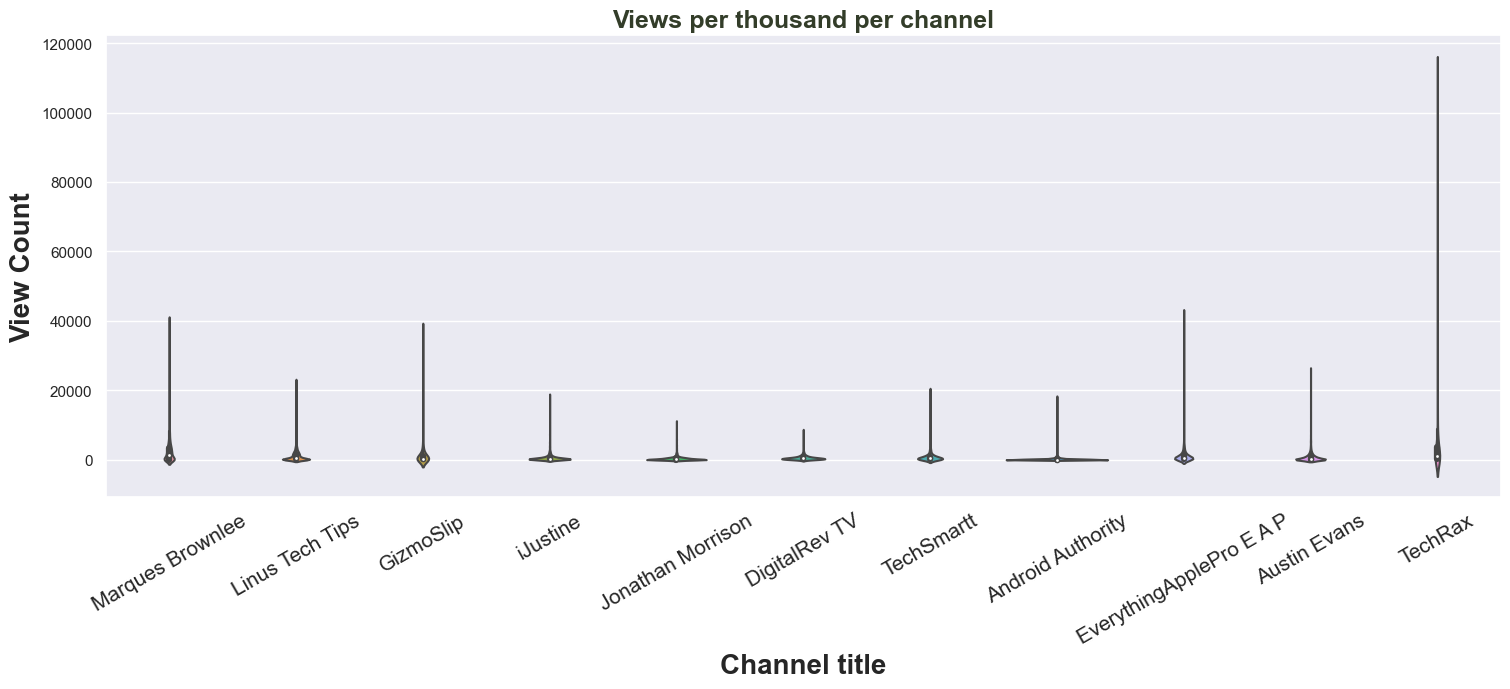

In [968]:
plt.rcParams['figure.figsize'] = (18,6)
sns.violinplot(x = 'channelTitle', y= 'viewCount', data = df)
plt.title("Views per thousand per channel", fontsize = 18, weight= 600, color = '#333d29')
plt.xticks(rotation = 30, size= 15)
plt.xlabel('Channel title', fontsize = 20, weight = 600)
plt.ylabel('View Count', fontsize = 20, weight = 600)

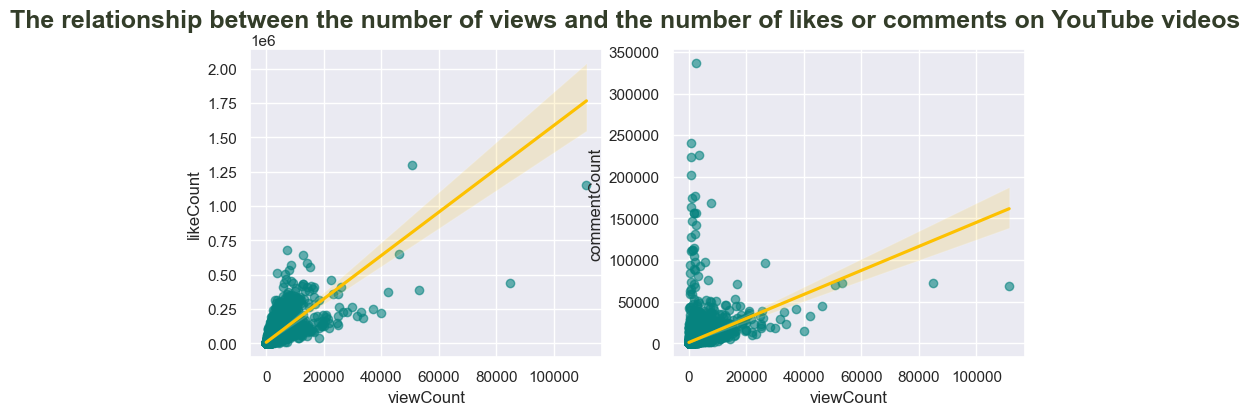

In [975]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))
plt.suptitle('The relationship between the number of views and the number of likes or comments on YouTube videos', fontsize = 18, weight= 600, color = '#333d29')
for i, col in enumerate(['likeCount','commentCount']):
    sns.regplot(y = col, x = "viewCount", data = df, ax = axes[i], scatter_kws={"color": "#06837f", "alpha": 0.6}, line_kws={"color": "#fdc100"})


In [794]:
duration_minutes = df[df.duration_minutes < 60]

Text(0.5, 1.0, 'The duration of videos on youtube')

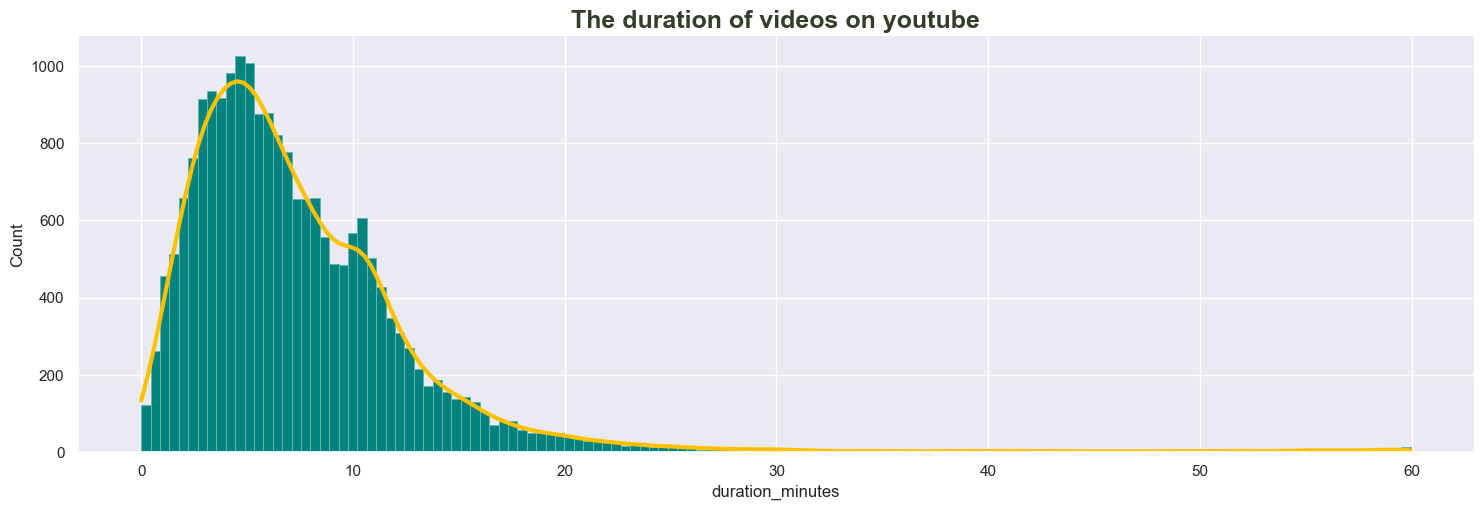

In [795]:
sns.displot(data = duration_minutes,x = 'duration_minutes', kind = 'hist',kde = True, color='#fdc100', facecolor='#06837f', edgecolor='#64b6ac', line_kws={'lw': 3}, aspect=3) 
plt.title('The duration of videos on youtube', fontsize=18, weight=600, color='#333d29')

<AxesSubplot:xlabel='duration_minutes', ylabel='commentRatio'>

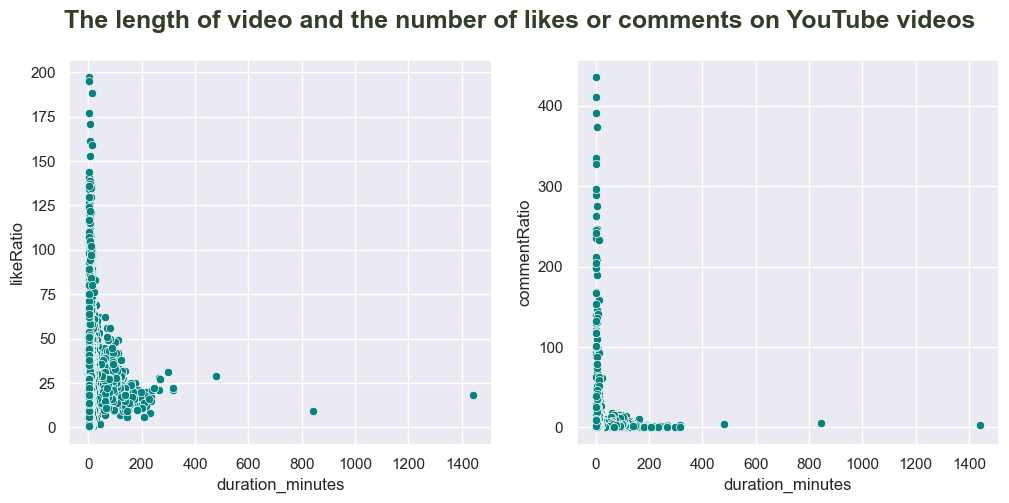

In [977]:
fig, ax = plt.subplots(nrows = 1, ncols =2 , figsize = (12,5))
plt.suptitle('The length of video and the number of likes or comments on YouTube videos', fontsize = 18, weight= 600, color = '#333d29')
sns.scatterplot(x = 'duration_minutes', y = 'likeRatio', data = df, ax = ax[0], color= "#06837f" )
sns.scatterplot(x = 'duration_minutes', y = 'commentRatio', data = df, ax = ax[1], color='#06837f')

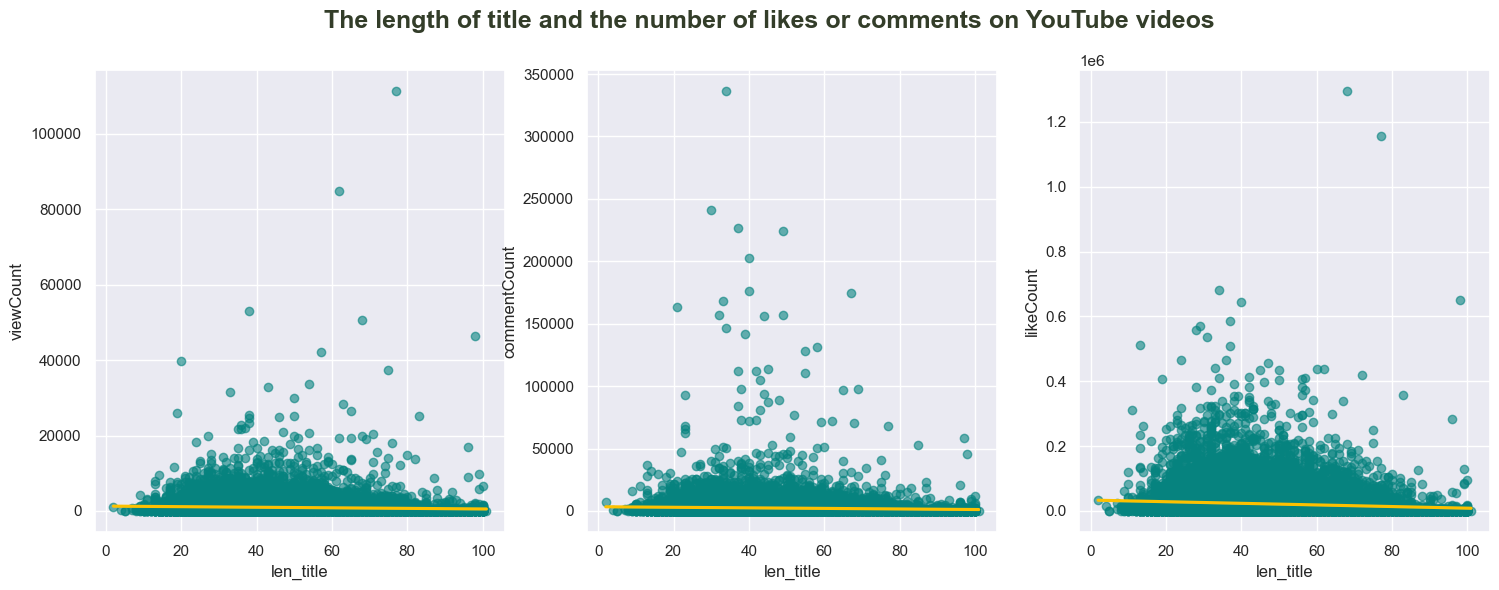

In [982]:
fig, ax = plt.subplots(1,3)
list = ['viewCount','commentCount','likeCount']
plt.suptitle('The length of title and the number of likes or comments on YouTube videos', fontsize = 18, weight= 600, color = '#333d29')

for i, col in enumerate(list):
    sns.regplot(y = col, x = "len_title", data = df, ax = ax[i], scatter_kws={"color": "#06837f", "alpha": 0.6}, line_kws={"color": "#fdc100"})



In [799]:
df_title = df.groupby('channelTitle')['video_id'].count().reset_index()
df_title.rename(columns = {'video_id': 'number_video'}, inplace = True)
df_title

channelTitle  number_video
0          Android Authority          4090
1               Austin Evans          1877
2              DigitalRev TV           761
3   EverythingApplePro E A P          1757
4                  GizmoSlip           372
5          Jonathan Morrison          1241
6            Linus Tech Tips          6160
7           Marques Brownlee          1537
8                    TechRax           542
9                 TechSmartt           680
10                  iJustine          2311

In [800]:
df_ratioLike = df.groupby('channelTitle')['likeCount'].mean().reset_index()
df_ratioLike

channelTitle  likeCount
0          Android Authority    2200.92
1               Austin Evans   15347.52
2              DigitalRev TV    4611.81
3   EverythingApplePro E A P   19586.86
4                  GizmoSlip   16535.37
5          Jonathan Morrison    8129.77
6            Linus Tech Tips   33761.07
7           Marques Brownlee   68764.98
8                    TechRax   40555.08
9                 TechSmartt   18079.21
10                  iJustine   12400.53

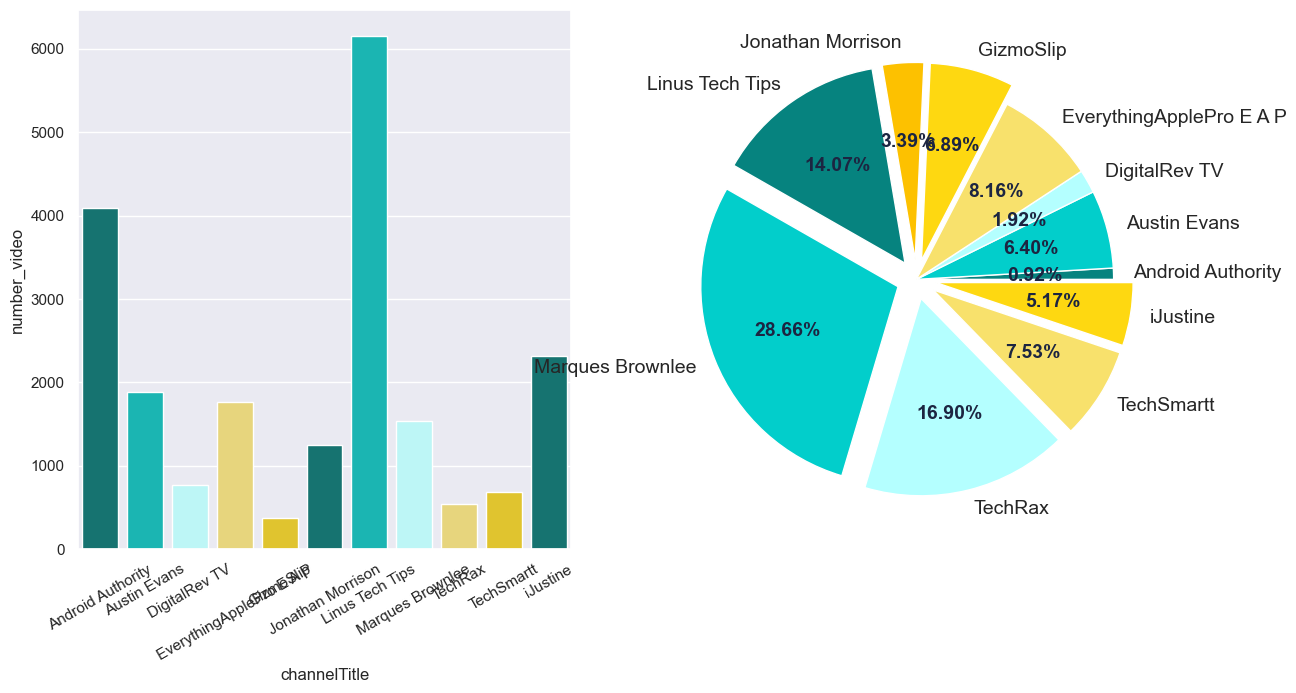

In [801]:
fig, axes = plt.subplots(nrows = 1, ncols= 2, figsize = (14,7))

ax = sns.barplot(data = df_title, x = 'channelTitle', y = 'number_video', ax = axes[0], palette=['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811'] )
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

wedges, texts, autotexts = axes[1].pie(x=df_ratioLike['likeCount'], labels=df_ratioLike['channelTitle'], autopct='%.2f%%',
                                       textprops=dict(fontsize=14), explode=[0,0,0,0,0.1,0.1,0.1,0.1,0.1,0.1,0.1], colors=['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811', '#fdc100'])
for autotext in autotexts: 
    autotext.set_color('#1c2541')
    autotext.set_weight('bold')

In [802]:
Wordcloud for words in title

SyntaxError: invalid syntax (1722704893.py, line 1)

In [803]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
df['title_no_stopwords'] = df['title'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])


In [804]:
df['title']

0                              I Made My Own Sneaker! M251
1        I Spent $40,000 to Unbox a Sealed Original iPh...
2                       A Hidden Google Assistant Feature!
3             The ROG Phone 7 Ultimate is Just Ridiculous!
4                  The Rivian R1S Is... The Best SUV Ever?
                               ...                        
21323    PSP -Lego Indiana Jones: The Original Adventur...
21324       8.5" Portable DVD Player from GPX   -Unboxing-
21325                        iPod Nano 8GB Unboxing -Blue-
21326                            Lockerz #2 Unboxing Video
21327                            Lockerz #1 Unboxing Video
Name: title, Length: 21328, dtype: object

In [805]:
all_words = [a for b in df['title_no_stopwords'].tolist() for a in b]
all_words = ' '.join(all_words)

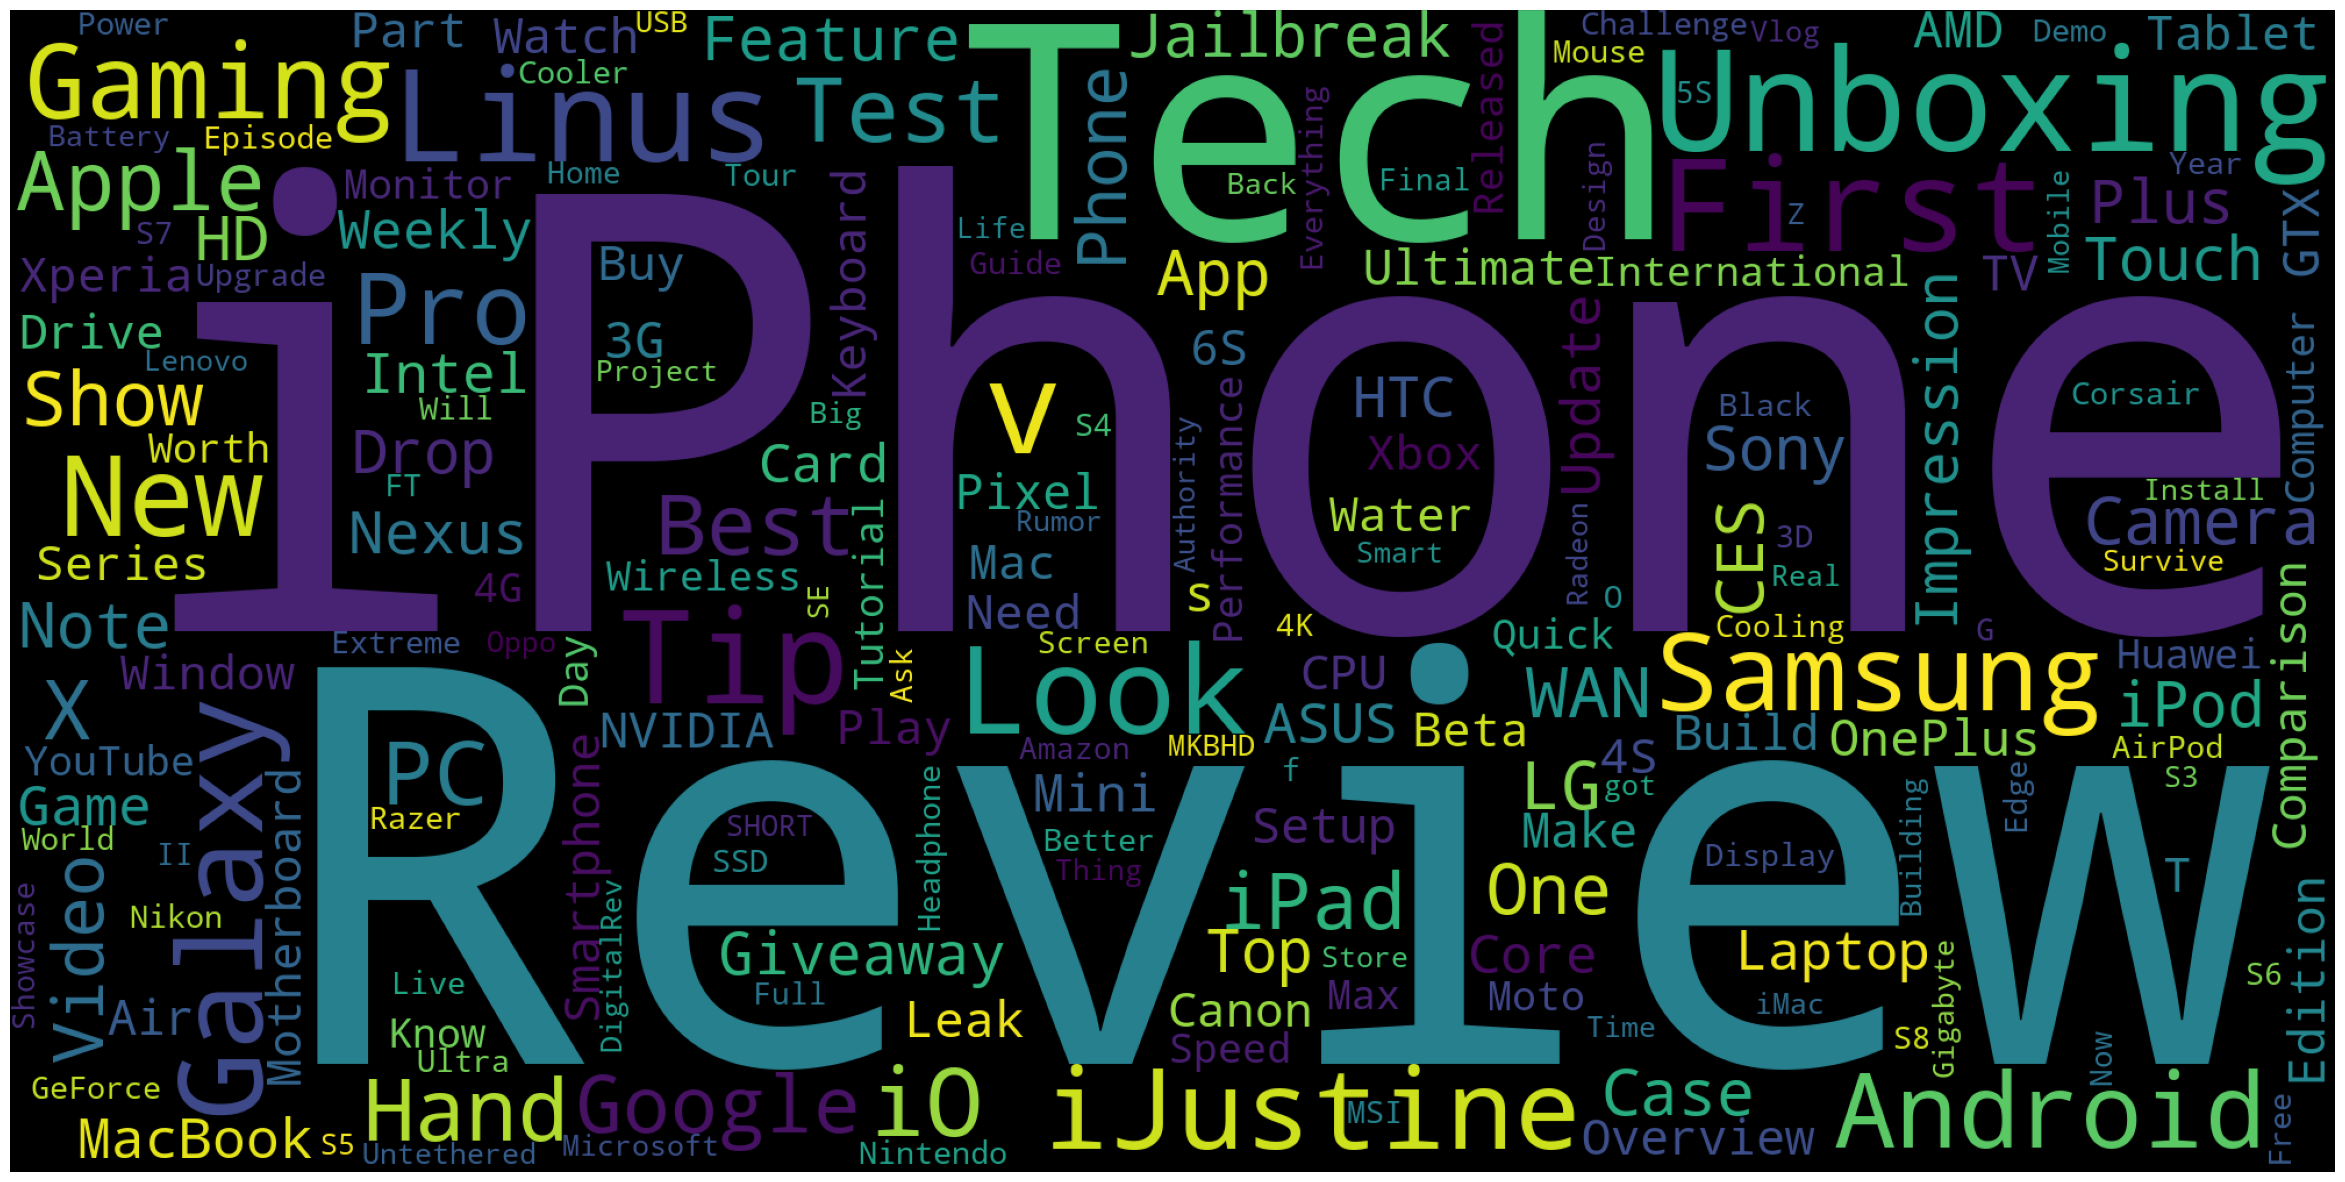

In [806]:
def plot_cloud(wordscloud):
    plt.figure(figsize = (30,20))
    plt.imshow(wordscloud)
    plt.axis("off")
    

wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='black', 
                      colormap='viridis', collocations=False).generate(all_words)
plot_cloud(wordcloud)

In [807]:
df['tags_no_stopwords'] = df['tags'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])


In [808]:
df['tags']

0        [MKBHD, MKBHD shoe, M251, Atoms, MKBHD sneaker...
1        [original iphone, sealed iphone, MKBHD, first ...
2        [Google Assistant, Assistant feature, Google a...
3        [ROG Phone, ROG phone 7, MKBHD, ROG Phone Ulti...
4        [Rivian, Rivian R1S, MKBHD, R1S SUV, R2, R2S, ...
                               ...                        
21323    [psp, firmware, lego, indiana, jones, review, ...
21324    [dvd player, gpx, sony, panasonic, 8.5, inch, ...
21325    [ipod nano, 8gb, 16gb, unboxing, christmas, gi...
21326    [lockerz, gpt, unboxing, giveaway, legit, scam...
21327    [lockerz, gpt, unboxing, giveaway, legit, scam...
Name: tags, Length: 21328, dtype: object

In [809]:
df['tags'] = df['tags'].apply(lambda x: ', '.join(map(str,x)) if isinstance(x, type(list)) else 0)

In [810]:
df['tags']

0        MKBHD, MKBHD shoe, M251, Atoms, MKBHD sneaker,...
1        original iphone, sealed iphone, MKBHD, first g...
2        Google Assistant, Assistant feature, Google as...
3        ROG Phone, ROG phone 7, MKBHD, ROG Phone Ultim...
4        Rivian, Rivian R1S, MKBHD, R1S SUV, R2, R2S, R...
                               ...                        
21323    psp, firmware, lego, indiana, jones, review, a...
21324    dvd player, gpx, sony, panasonic, 8.5, inch, f...
21325    ipod nano, 8gb, 16gb, unboxing, christmas, giv...
21326    lockerz, gpt, unboxing, giveaway, legit, scam,...
21327    lockerz, gpt, unboxing, giveaway, legit, scam,...
Name: tags, Length: 21328, dtype: object

In [811]:
df['tags']= df['tags'].str.replace(',', '')

In [817]:
df['tag_no_stopwords'] = df['tags'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = [a for b in df['tag_no_stopwords'].tolist() for a in b]
all_tag_words = ' '.join(all_words)

In [818]:

wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='black', 
                      colormap='viridis', collocations=False).generate(all_tag_words)

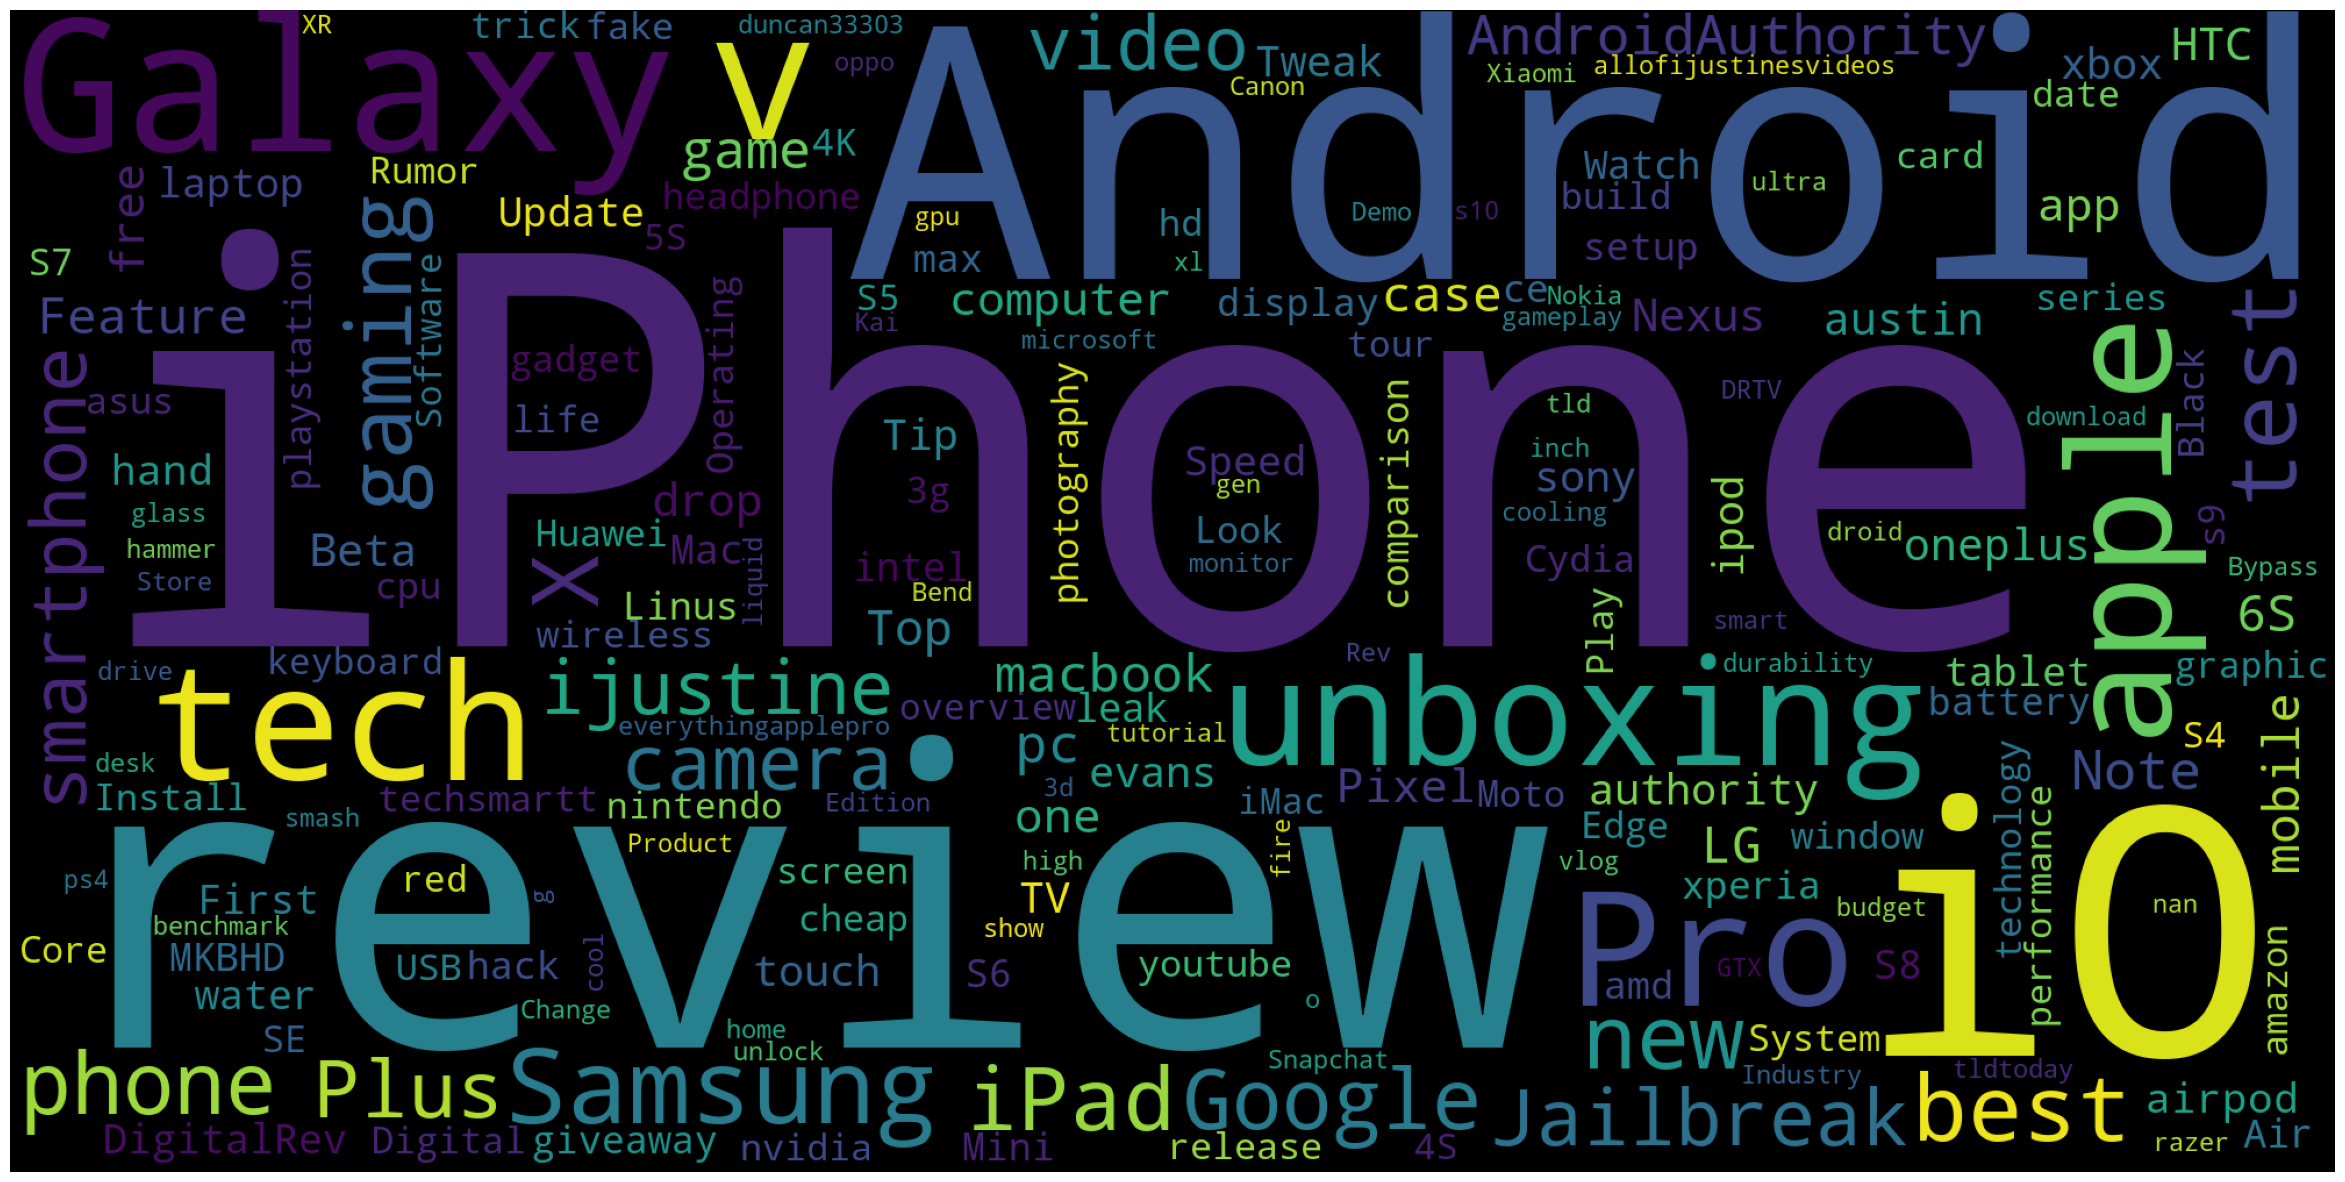

In [819]:
plot_cloud(wordcloud)

Text(0.5, 1.0, '\nThe average number tags\n')

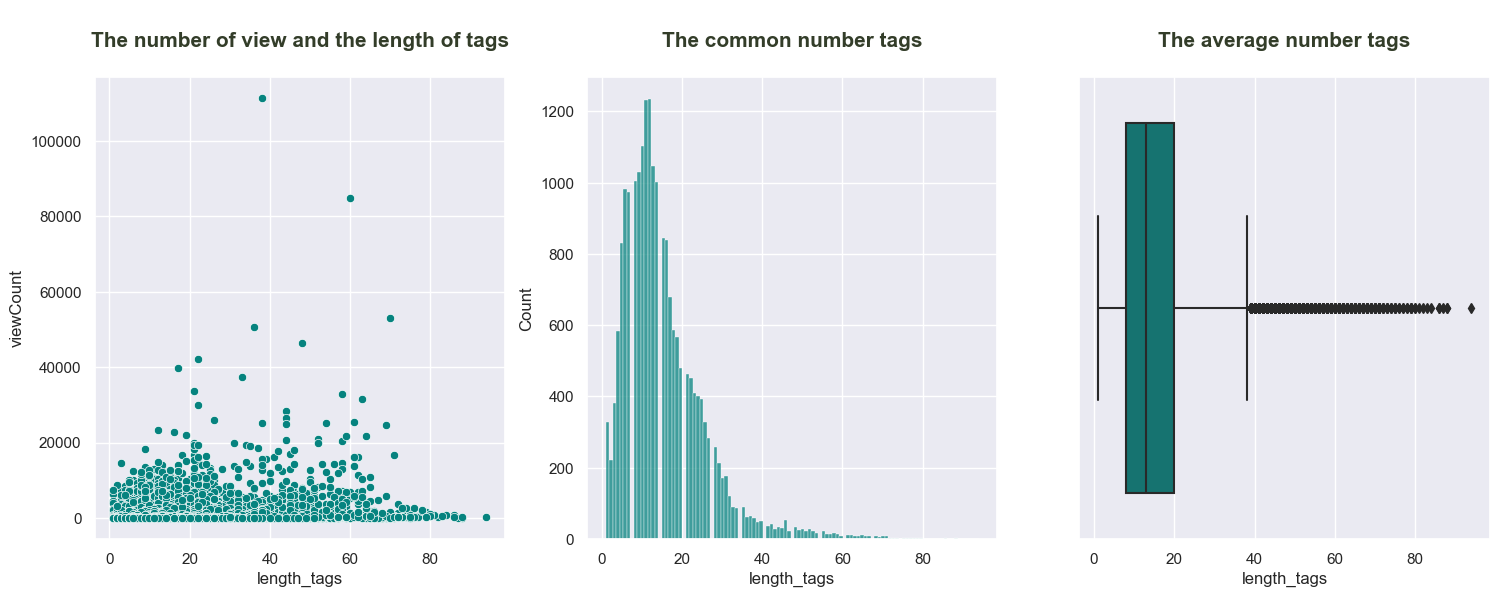

In [998]:
fig, ax = plt.subplots(1,3)
sns.scatterplot(data = df, x = 'length_tags', y = 'viewCount', ax = ax[0],color= '#06837f')
ax[0].set_title('\nThe number of view and the length of tags\n', fontsize = 15, weight = 600, color = '#333d29' )
sns.histplot(data = df, x = 'length_tags', ax = ax[1],color= '#06837f')
ax[1].set_title('\nThe common number tags\n', fontsize = 15, weight = 600, color = '#333d29' )
sns.boxplot(data = df, x = 'length_tags', ax = ax[2], color= '#06837f')
ax[2].set_title('\nThe average number tags\n', fontsize = 15, weight = 600, color = '#333d29' )


In [828]:
df_hour = pd.DataFrame(df.groupby('published_Hour')['published_Hour'].count())
df_hour.rename(columns={'published_Hour': 'hour'}, inplace = True )
df_hour = df_hour.reset_index()

In [866]:
df_day_view = df.groupby('publishedDayName')['viewCount'].mean()
df['published_day']=pd.to_datetime(df['published_day'])
df['published_year']=df['published_day'].dt.year
df['published_month']=df['published_day'].dt.month
df_day = df['published_day'].dt.day

In [869]:
df_day= pd.DataFrame(df.groupby('publishedDayName')['publishedDayName'].count())
df_day.rename(columns={'publishedDayName': 'number_day_publish'}, inplace = True)
df_day = df_day.reset_index()

In [988]:
df_day

publishedDayName  number_day_publish
0           Friday                3166
1           Monday                2617
2         Saturday                3335
3           Sunday                2470
4         Thursday                3179
5          Tuesday                3118
6        Wednesday                3443

/var/folders/rf/pnx59_vj2ds5h90h14wrg_y00000gn/T/ipykernel_1177/1440348804.py:4: UserWarning:

FixedFormatter should only be used together with FixedLocator



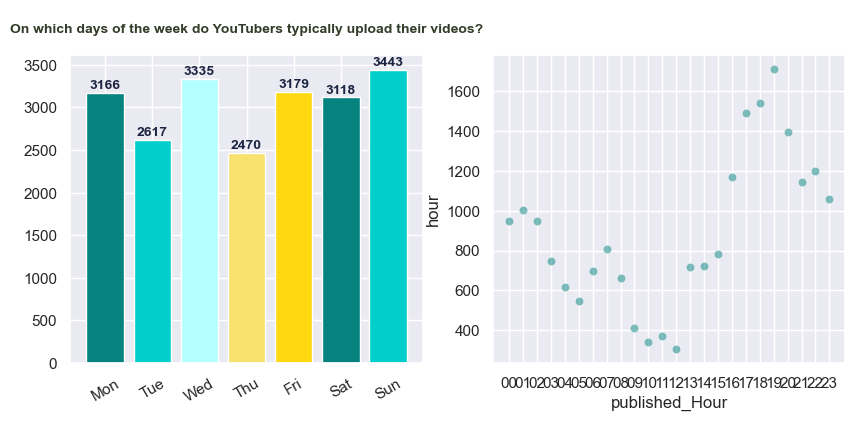

In [1001]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

ax[0].bar(x=df_day['publishedDayName'], height=df_day['number_day_publish'], color=['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811'])
ax[0].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=30)

for i, value in enumerate(df_day['number_day_publish']):
    ax[0].text(i, value + 50, value, ha='center', fontsize=10, weight=600, color='#1c2541')

ax[0].set_title('\nOn which days of the week do YouTubers typically upload their videos?\n', fontsize = 10, weight = 600, color = '#333d29' )



ax = sns.scatterplot(data = df_hour, x = df_hour['published_Hour'], y = df_hour['hour'], ax = ax[1], sizes=(20, 200), alpha=.5, color='#06837f')
                                       

In [850]:
df_year = df.groupby('published_year')["video_id"].count().reset_index()
df_year.rename(columns = {'video_id': 'number_of_video'}, inplace = True)

df_year_view = df.groupby('published_year')['viewCount'].mean().reset_index()
df_year_view = pd.merge(df_year,df_year_view, on = 'published_year')

published_year  number_of_video
0             2006               20
1             2007               39
2             2008              176
3             2009              664
4             2010             1373
5             2011             1426
6             2012             1606
7             2013             1936
8             2014             1829
9             2015             2123
10            2016             2268
11            2017             1984
12            2018             1660
13            2019             1244
14            2020             1002
15            2021              765
16            2022              871
17            2023              342

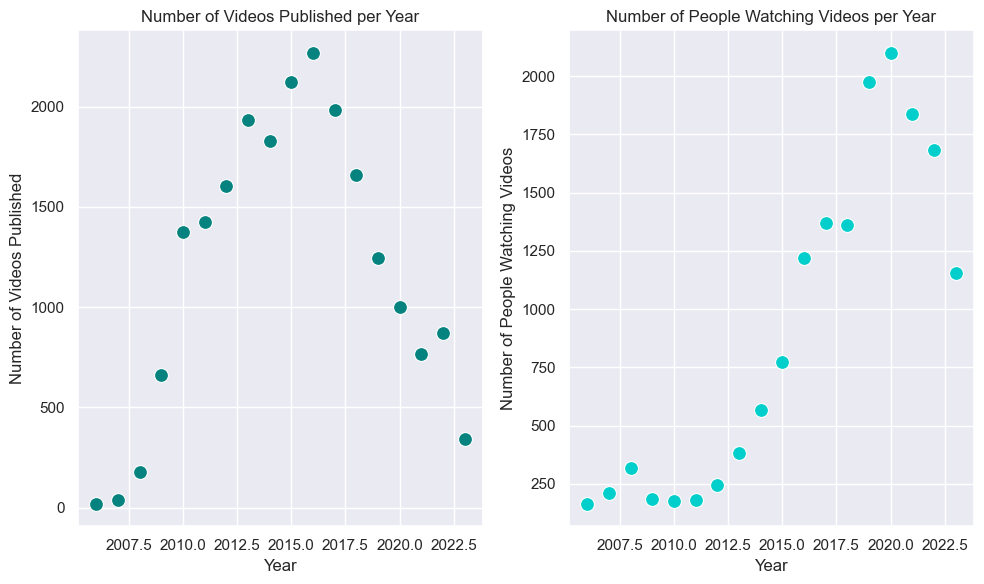

In [881]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

# Plot the number of videos published
sns.scatterplot(data=df_year_view, x='published_year', y='number_of_video', s=100, color='#06837f', ax=ax[0])
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Videos Published')
ax[0].set_title('Number of Videos Published per Year')

# Plot the number of people watching videos
sns.scatterplot(data=df_year_view, x='published_year', y='viewCount', s=100, color='#02cecb', ax=ax[1])
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Number of People Watching Videos')
ax[1].set_title('Number of People Watching Videos per Year')

plt.tight_layout()
plt.show()

In [1004]:
fig = px.scatter(df, x = 'viewCount', y = 'likeRatio', animation_frame = 'published_year')
fig

In [914]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21328 entries, 0 to 21327
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype                  
---  ------              --------------  -----                  
 0   video_id_x          21328 non-null  object                 
 1   channelTitle        21328 non-null  object                 
 2   title               21328 non-null  object                 
 3   description         21308 non-null  object                 
 4   tags                20813 non-null  object                 
 5   publishedAt         21328 non-null  datetime64[ns, tzutc()]
 6   viewCount           21299 non-null  float64                
 7   likeCount           21303 non-null  float64                
 8   commentCount        21262 non-null  float64                
 9   duration            21328 non-null  object                 
 10  definition          21328 non-null  object                 
 11  caption             21328 non-null  bool 

/var/folders/rf/pnx59_vj2ds5h90h14wrg_y00000gn/T/ipykernel_1177/588511858.py:8: FutureWarning:

Passing `palette` without assigning `hue` is deprecated.

/var/folders/rf/pnx59_vj2ds5h90h14wrg_y00000gn/T/ipykernel_1177/588511858.py:8: UserWarning:


The palette list has fewer values (5) than needed (11) and will cycle, which may produce an uninterpretable plot.

/var/folders/rf/pnx59_vj2ds5h90h14wrg_y00000gn/T/ipykernel_1177/588511858.py:10: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/rf/pnx59_vj2ds5h90h14wrg_y00000gn/T/ipykernel_1177/588511858.py:8: FutureWarning:

Passing `palette` without assigning `hue` is deprecated.

/var/folders/rf/pnx59_vj2ds5h90h14wrg_y00000gn/T/ipykernel_1177/588511858.py:8: UserWarning:


The palette list has fewer values (5) than needed (11) and will cycle, which may produce an uninterpretable plot.

/var/folders/rf/pnx59_vj2ds5h90h14wrg_y00000gn/T/ipykernel_1177/588511858.py:10: UserWarning:

FixedFormatter shou

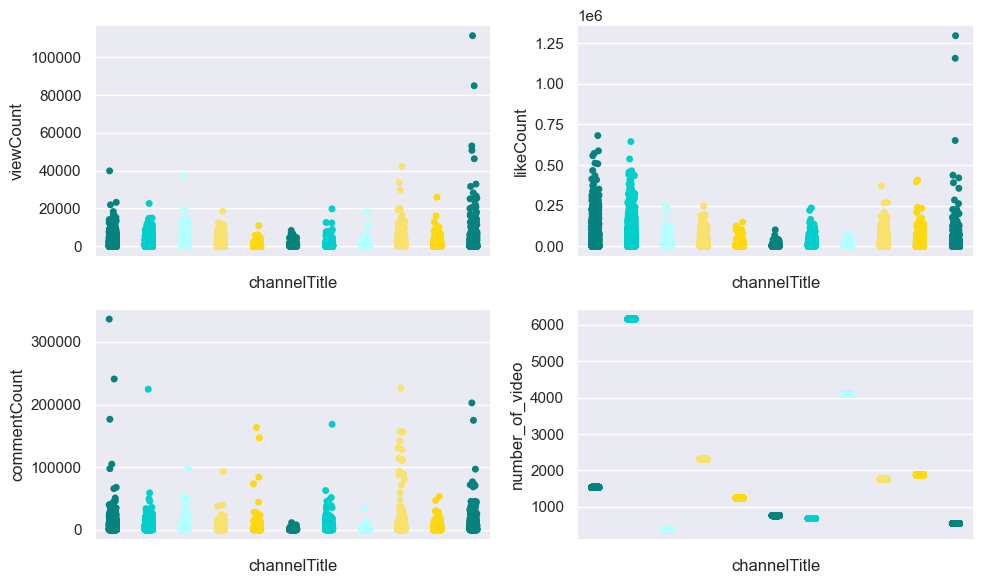

In [931]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

# List of columns to plot
columns = ['viewCount', 'likeCount', 'commentCount', 'number_of_video']

# Loop over the columns and plot a stripplot for each one
for i, column in enumerate(columns):
    sns.stripplot(data=df, x='channelTitle', y=column, ax=ax.flatten()[i], palette=['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811'])
    ax.flatten()[i].set_ylabel(column)
    ax.flatten()[i].set_xticklabels(ax.flatten()[i].get_xticklabels(), rotation=90)


# Adjust the layout of the subplots
plt.tight_layout()





In [906]:
df_video_id = df.groupby('channelTitle')['video_id'].count().reset_index()
df = pd.merge(df, df_video_id, on = 'channelTitle')
df.rename(columns = {'video_id_y':'number_of_video'}, inplace= True)

KeyError: 'Column not found: video_id'

In [913]:
df =df.rename(columns = {'video_id_y':'number_of_video'})
df

video_id_x      channelTitle  \
0      1eI8HpJtq-s  Marques Brownlee   
1      -BwUyTrU9fo  Marques Brownlee   
2      K6gtEGnbR6I  Marques Brownlee   
3      OkLOJapGjC4  Marques Brownlee   
4      wR-0knMVSGw  Marques Brownlee   
...            ...               ...   
21323  G_Okyqke9DY           TechRax   
21324  2GLATVa0qVo           TechRax   
21325  i-DZueucksk           TechRax   
21326  g2FsBh7q6CA           TechRax   
21327  Z8WIDhrLmsw           TechRax   

                                                   title  \
0                            I Made My Own Sneaker! M251   
1      I Spent $40,000 to Unbox a Sealed Original iPh...   
2                     A Hidden Google Assistant Feature!   
3           The ROG Phone 7 Ultimate is Just Ridiculous!   
4                The Rivian R1S Is... The Best SUV Ever?   
...                                                  ...   
21323  PSP -Lego Indiana Jones: The Original Adventur...   
21324     8.5" Portable DVD Player from GPX   -Unboxing-   
21325                      iPod Nano 8GB Unboxing -Blue-   
21326                          Lockerz #2 Unboxing Video   
21327                          Lockerz #1 Unboxing Video   

                                             description  \
0      To get the shoes: http://atoms.com/MKBHD\nFirs...   
1      This original sealed iPhone cost $40,000. I re...   
2            It's been smarter than most people realize.   
3      The $1400 ROG Phone 7 Ultimate is the most ded...   
4      Rivian R1S is an awesome, expensive SUV. That'...   
...                                                  ...   
21323  Want to Buy It?\r\n\r\nhttp://www.amazon.com/L...   
21324  Check Out Their Website At:\r\n\r\nhttp://www....   
21325  Check Out The Latest News On idooble!\r\n\r\nh...   
21326  Hey Guys! This is my 2nd Video for my New Yout...   
21327  Hey Guys! This is my opening video for the Cha...   

                                                    tags  \
0      MKBHD MKBHD shoe M251 Atoms MKBHD sneaker MKBH...   
1      original iphone sealed iphone MKBHD first gen ...   
2      Google Assistant Assistant feature Google assi...   
3      ROG Phone ROG phone 7 MKBHD ROG Phone Ultimate...   
4      Rivian Rivian R1S MKBHD R1S SUV R2 R2S R2T Aut...   
...                                                  ...   
21323  psp firmware lego indiana jones review awesome...   
21324  dvd player gpx sony panasonic 8.5 inch free lo...   
21325  ipod nano 8gb 16gb unboxing christmas givaway ...   
21326  lockerz gpt unboxing giveaway legit scam no fu...   
21327  lockerz gpt unboxing giveaway legit scam no sc...   

                    publishedAt  viewCount  likeCount  commentCount  duration  \
0     2023-04-25 14:59:45+00:00    1097.08   73703.00       5574.00    PT7M2S   
1     2023-04-20 22:02:23+00:00    3507.68  199802.00       9518.00  PT13M24S   
2     2023-04-14 14:50:28+00:00    1209.42   81095.00       1324.00     PT59S   
3     2023-04-13 12:30:43+00:00    1555.78   66134.00       3467.00  PT10M49S   
4     2023-04-11 23:20:19+00:00    1938.45   65995.00       3287.00  PT14M20S   
...                         ...        ...        ...           ...       ...   
21323 2009-12-31 06:30:52+00:00      54.12     501.00         67.00   PT3M14S   
21324 2009-12-26 22:43:00+00:00      32.22     415.00         65.00   PT2M23S   
21325 2009-12-25 20:11:22+00:00      54.20     932.00        240.00   PT3M52S   
21326 2009-09-25 22:35:42+00:00      38.37     550.00         93.00   PT2M30S   
21327 2009-09-25 01:26:34+00:00     256.15    4678.00       2237.00   PT2M15S   

       ... likeRatio  commentRatio len_title  \
0      ...     67.00          5.00        27   
1      ...     57.00          3.00        50   
2      ...     67.00          1.00        34   
3      ...     43.00          2.00        44   
4      ...     34.00          2.00        39   
...    ...       ...           ...       ...   
21323  ...      9.00          1.00        57   
21324  

In [933]:
df.drop(columns = 'number_video', inplace = True)

In [934]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21328 entries, 0 to 21327
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype                  
---  ------              --------------  -----                  
 0   video_id_x          21328 non-null  object                 
 1   channelTitle        21328 non-null  object                 
 2   title               21328 non-null  object                 
 3   description         21308 non-null  object                 
 4   tags                20813 non-null  object                 
 5   publishedAt         21328 non-null  datetime64[ns, tzutc()]
 6   viewCount           21299 non-null  float64                
 7   likeCount           21303 non-null  float64                
 8   commentCount        21262 non-null  float64                
 9   duration            21328 non-null  object                 
 10  definition          21328 non-null  object                 
 11  caption             21328 non-null  bool 

In [940]:
df_new = df.drop(columns = ['tag_no_stopwords','tags_no_stopwords','title_no_stopwords','likeRatio'])

<AxesSubplot:title={'center':'Correlation of youtube video features'}>

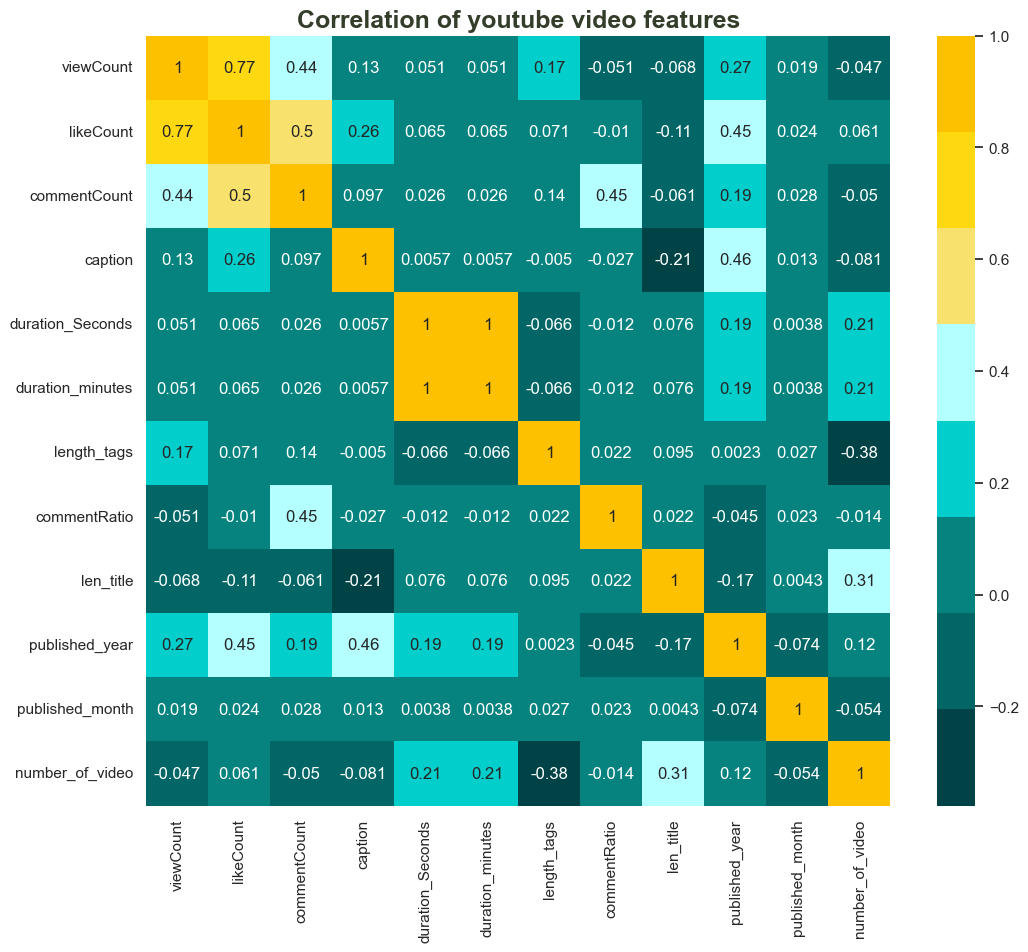

In [945]:
plt.figure(figsize = (12,10))
plt.title('Correlation of youtube video features', fontsize = 18, weight = 600, color='#333d29')
sns.heatmap(df_new.corr(), annot=True, cmap=['#004346', '#036666', '#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811', '#fdc100'])